In [43]:
from random import sample

from sshtunnel import SSHTunnelForwarder
import psycopg2
import os
import pandas as pd
import numpy as np

# SSH connection details.
ssh_host = 'loki.research.cs.dal.ca'
ssh_port = 22
ssh_username = os.getenv('LOKI_USERNAME')
ssh_password = os.getenv('LOKI_PASSWORD')

# Database connection details.
db_host = '127.0.0.1'
db_port = 5432
db_name = 'staging_db'
db_user = os.getenv('STAGING_DB_USERNAME')
db_password = os.getenv('STAGING_DB_PASSWORD')

# Establish SSH tunnel and connect to PostgreSQL.
try:
    with SSHTunnelForwarder(
        (ssh_host, ssh_port),
        ssh_username=ssh_username,
        ssh_password=ssh_password,
        remote_bind_address=('127.0.0.1', db_port)  # Forwarding PostgreSQL port.
    ) as tunnel:
    
        # Connect to PostgreSQL database through the SSH tunnel.
        conn = psycopg2.connect(
            host=db_host,
            port=tunnel.local_bind_port,  # use the local port set by the tunnel.
            dbname=db_name,
            user=db_user,
            password=db_password
        )
        
        print("Database connection established")
        
        accelerometer_query = "SELECT * FROM study_prositvd.accelerometer;"
        activity_query = "SELECT * FROM study_prositvd.activity;"
        lock_state_query = "SELECT * FROM study_prositvd.lock_state;"
        
        df_accelerometer = pd.read_sql_query(accelerometer_query, conn)
        df_activity = pd.read_sql_query(activity_query, conn)
        df_lock_state = pd.read_sql_query(lock_state_query, conn)
        
        # Close database connection.
        conn.close()

except Exception as e:
    print(f"An error occurred: {e}")

Database connection established


In [44]:
df_accelerometer.head()

,_id,participantid,measuredat,uploadedat,value0,value1,value2
0,XbSWMtjaErdjG4Bxd,prositvd5,2022-11-03 17:22:59,2022-11-03 19:44:14.581,-0.196,0.242,-0.065
1,Wn3djt9CS6fRcAXg6,prositvd5,2022-11-03 17:23:00,2022-11-03 19:44:14.581,-0.007,-0.004,0.03
2,4J4f2THCPSPkjWnSN,prositvd5,2022-11-03 17:23:02,2022-11-03 19:44:14.581,0.048,0.17,-0.224
3,PBmnhHBMdAjgYuPja,prositvd5,2022-11-03 17:23:03,2022-11-03 19:44:14.581,-0.041,-0.007,0.019
4,rzfZPDAJiNkvqiMuT,prositvd5,2022-11-03 17:23:17,2022-11-03 19:44:14.581,0.13,0.166,0.228


In [45]:
df_activity.head()

,_id,participantid,measuredat,uploadedat,value0
0,Zxuf3g5wB8kNqAP79,prositvd5,2022-11-03 17:22:53,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i..."
1,TgaYNMoLjnFwjWkvJ,prositvd5,2022-11-03 17:23:23,2022-11-03 19:44:15.215,"isStationary, 1, isWalking, 0, isRunning, 0, i..."
2,L3BM8zEGWt6cNRZSe,prositvd5,2022-11-03 17:23:24,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i..."
3,6yQh2KByF9PXJcCdy,prositvd5,2022-11-03 17:23:25,2022-11-03 19:44:15.215,"isStationary, 1, isWalking, 0, isRunning, 0, i..."
4,pspcovgSFd9wZJXeH,prositvd5,2022-11-03 17:23:26,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i..."


In [46]:
df_lock_state.head()

,_id,participantid,measuredat,uploadedat,value0
0,EJRK2MdCXW29XSNKT,prositvd5,2022-11-03 17:24:54,2022-11-03 19:44:19.417,LOCKED
1,c3e3Ti9rqgLaXSHmn,prositvd5,2022-11-03 17:24:57,2022-11-03 19:44:19.417,UNLOCKED
2,GdBLBidYb44o2w6Kd,prositvd5,2022-11-03 17:26:19,2022-11-03 19:44:19.417,LOCKED
3,SaTuECPdE463Z7n26,prositvd5,2022-11-03 17:37:50,2022-11-03 19:44:19.417,UNLOCKED
4,273mh7swiQC3B9Y4F,prositvd5,2022-11-03 17:50:19,2022-11-03 19:44:19.417,LOCKED


In [47]:
# Join accelerometer and activity tables on participantid and measuredat values.

df_joined_acc_activity = pd.merge(df_accelerometer, df_activity, on=['participantid', 'measuredat'], how='inner')
df_joined_acc_activity.head(50)

,_id_x,participantid,measuredat,uploadedat_x,value0_x,value1,value2,_id_y,uploadedat_y,value0_y
0,PCYQgpyyzCbEiQLFo,prositvd5,2022-11-03 17:24:54,2022-11-03 19:44:14.581,-0.14,-0.091,-0.182,eRg5EuBmzNALDWc48,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i..."
1,2Pa4Z9mdZNpdsohNq,prositvd5,2022-11-03 17:25:01,2022-11-03 19:44:14.581,-0.359,0.07,-0.064,6PmCtXAS5k7ezgxnm,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i..."
2,ApNjB9r2fuFNrjJy5,prositvd5,2022-11-03 17:26:18,2022-11-03 19:44:14.581,0.218,0.142,0.003,oJwL8MpfqgmRSJyXz,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i..."
3,Yi7izJm5ACBQfjKRM,prositvd5,2022-11-03 17:26:29,2022-11-03 19:44:14.581,-0.044,-0.008,0.019,YiDKCdvbbgXynZtE4,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i..."
4,2c886m7rpMbSMRr4j,prositvd5,2022-11-03 17:29:25,2022-11-03 19:44:14.581,0.189,0.118,-0.113,vrC7akTfqbAYkdrGw,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i..."
5,rYswmLak6BwiR8K7w,prositvd5,2022-11-03 17:29:29,2022-11-03 19:44:14.581,0.09,-0.128,-0.384,igBQyhRrNaqdCikuf,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 1, isRunning, 0, i..."
6,JubPykum9DKN9NYvg,prositvd5,2022-11-03 17:29:36,2022-11-03 19:44:14.581,0.084,0.104,0.199,w8zYEin9yLgL4LdMj,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 1, isRunning, 0, i..."
7,bj7w78JWeG6hNkxv2,prositvd5,2022-11-03 17:29:37,2022-11-03 19:44:14.581,0.068,0.168,-0.23,osGvCuBcbe8zmLT2k,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 1, isRunning, 0, i..."
8,AoPHn7chQHAMSvDBH,prositvd5,2022-11-03 17:29:47,2022-11-03 19:44:14.581,0.027,-0.147,0.028,PzgHbFT2GAnRkPyZs,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 1, isRunning, 0, i..."
9,SFJcoRZoGycXPav6Q,prositvd5,2022-11-03 17:29:52,2022-11-03 19:44:14.581,0.088,0.201,-0.291,nrXs6CnKzNpn5BMLy,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 1, isRunning, 0, i..."


In [48]:
# Compute RMS value of the accelerometer data.

# Ensure the accelerometer values are numeric
df_joined_acc_activity['value0_x'] = pd.to_numeric(df_joined_acc_activity['value0_x'], errors='coerce')
df_joined_acc_activity['value1'] = pd.to_numeric(df_joined_acc_activity['value1'], errors='coerce')
df_joined_acc_activity['value2'] = pd.to_numeric(df_joined_acc_activity['value2'], errors='coerce')

# Calculate the Root Mean Square (RMS) of the 3 accelerometer values.
df_joined_acc_activity['accelerometer_rms'] = np.sqrt((df_joined_acc_activity['value0_x']**2 + df_joined_acc_activity['value1']**2 + df_joined_acc_activity['value2']**2) / 3)

In [49]:
df_joined_acc_activity.head()

,_id_x,participantid,measuredat,uploadedat_x,value0_x,value1,value2,_id_y,uploadedat_y,value0_y,accelerometer_rms
0,PCYQgpyyzCbEiQLFo,prositvd5,2022-11-03 17:24:54,2022-11-03 19:44:14.581,-0.140,-0.091,-0.182,eRg5EuBmzNALDWc48,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i...",0.142601
1,2Pa4Z9mdZNpdsohNq,prositvd5,2022-11-03 17:25:01,2022-11-03 19:44:14.581,-0.359,0.070,-0.064,6PmCtXAS5k7ezgxnm,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i...",0.214381
2,ApNjB9r2fuFNrjJy5,prositvd5,2022-11-03 17:26:18,2022-11-03 19:44:14.581,0.218,0.142,0.003,oJwL8MpfqgmRSJyXz,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i...",0.150219
3,Yi7izJm5ACBQfjKRM,prositvd5,2022-11-03 17:26:29,2022-11-03 19:44:14.581,-0.044,-0.008,0.019,YiDKCdvbbgXynZtE4,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i...",0.028054
4,2c886m7rpMbSMRr4j,prositvd5,2022-11-03 17:29:25,2022-11-03 19:44:14.581,0.189,0.118,-0.113,vrC7akTfqbAYkdrGw,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i...",0.144238


In [50]:
# Filter the rows with "High confidence" in activity.

# Convert 'value0_y' column to string to ensure we can apply string operations.
df_joined_acc_activity['value0_y'] = df_joined_acc_activity['value0_y'].astype(str)

# Filter rows where 'value0_y' contains "Confidence, High"
df_joined_acc_activity_filtered = df_joined_acc_activity[df_joined_acc_activity['value0_y'].str.contains('Confidence, High', na=False)]

In [51]:
df_joined_acc_activity_filtered.head()

,_id_x,participantid,measuredat,uploadedat_x,value0_x,value1,value2,_id_y,uploadedat_y,value0_y,accelerometer_rms
0,PCYQgpyyzCbEiQLFo,prositvd5,2022-11-03 17:24:54,2022-11-03 19:44:14.581,-0.140,-0.091,-0.182,eRg5EuBmzNALDWc48,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i...",0.142601
1,2Pa4Z9mdZNpdsohNq,prositvd5,2022-11-03 17:25:01,2022-11-03 19:44:14.581,-0.359,0.070,-0.064,6PmCtXAS5k7ezgxnm,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i...",0.214381
2,ApNjB9r2fuFNrjJy5,prositvd5,2022-11-03 17:26:18,2022-11-03 19:44:14.581,0.218,0.142,0.003,oJwL8MpfqgmRSJyXz,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i...",0.150219
3,Yi7izJm5ACBQfjKRM,prositvd5,2022-11-03 17:26:29,2022-11-03 19:44:14.581,-0.044,-0.008,0.019,YiDKCdvbbgXynZtE4,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i...",0.028054
4,2c886m7rpMbSMRr4j,prositvd5,2022-11-03 17:29:25,2022-11-03 19:44:14.581,0.189,0.118,-0.113,vrC7akTfqbAYkdrGw,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i...",0.144238


In [52]:
# Create a new column 'is_active' based on whether 'isStationary, 0' is in 'value0_y'.
df_joined_acc_activity_filtered['is_active'] = df_joined_acc_activity_filtered['value0_y'].apply(lambda x: 1 if 'isStationary, 0' in x else 0)

In [53]:
df_joined_acc_activity_filtered.head()

,_id_x,participantid,measuredat,uploadedat_x,value0_x,value1,value2,_id_y,uploadedat_y,value0_y,accelerometer_rms,is_active
0,PCYQgpyyzCbEiQLFo,prositvd5,2022-11-03 17:24:54,2022-11-03 19:44:14.581,-0.140,-0.091,-0.182,eRg5EuBmzNALDWc48,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i...",0.142601,1
1,2Pa4Z9mdZNpdsohNq,prositvd5,2022-11-03 17:25:01,2022-11-03 19:44:14.581,-0.359,0.070,-0.064,6PmCtXAS5k7ezgxnm,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i...",0.214381,1
2,ApNjB9r2fuFNrjJy5,prositvd5,2022-11-03 17:26:18,2022-11-03 19:44:14.581,0.218,0.142,0.003,oJwL8MpfqgmRSJyXz,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i...",0.150219,1
3,Yi7izJm5ACBQfjKRM,prositvd5,2022-11-03 17:26:29,2022-11-03 19:44:14.581,-0.044,-0.008,0.019,YiDKCdvbbgXynZtE4,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i...",0.028054,1
4,2c886m7rpMbSMRr4j,prositvd5,2022-11-03 17:29:25,2022-11-03 19:44:14.581,0.189,0.118,-0.113,vrC7akTfqbAYkdrGw,2022-11-03 19:44:15.215,"isStationary, 0, isWalking, 0, isRunning, 0, i...",0.144238,1


In [57]:
def get_unique_participant_date_tuples(df):
    """
    This function takes a DataFrame and returns a sorted list of unique tuples containing
    (participantid, measuredat_date), sorted first by participantid and then by date.
    
    Args:
    - df: Input DataFrame that includes 'participantid' and 'measuredat' columns
    
    Returns:
    - A sorted list of unique (participantid, measuredat_date) tuples
    """
    # Extract date from 'measuredat' and create a new column for the date
    df['measuredat_date'] = df['measuredat'].dt.date

    # Create the list of unique (participantid, measuredat_date) tuples
    unique_tuples = df[['participantid', 'measuredat_date']].drop_duplicates()

    # Sort the DataFrame first by 'participantid' and then by 'measuredat_date'
    sorted_tuples = unique_tuples.sort_values(by=['participantid', 'measuredat_date'])

    # Convert to a list of tuples
    result = list(sorted_tuples.itertuples(index=False, name=None))
    
    return result


def get_participant_data_for_date(df, participant_tuple):
    """
    This function takes a DataFrame and a tuple containing (participantid, measuredat_date),
    and returns a DataFrame with 'accelerometer_rms' and 'is_active' for the given participantid and date.
    
    Args:
    - df: Input DataFrame containing 'participantid', 'measuredat', 'accelerometer_rms', and 'is_active'.
    - participant_tuple: A tuple in the format (participantid, measuredat_date).
    
    Returns:
    - A DataFrame with 'accelerometer_rms' and 'is_active' for the specified participant and date.
    """
    participantid, measuredat_date = participant_tuple
    
    # Filter the dataframe for the given participantid and measuredat_date
    filtered_df = df[(df['participantid'] == participantid) & (df['measuredat'].dt.date == measuredat_date)]
    
    # Return the 'accelerometer_rms' and 'is_active' columns
    return filtered_df[['accelerometer_rms', 'is_active']]

In [58]:
participant_date_tuples = get_unique_participant_date_tuples(df_joined_acc_activity_filtered)

In [68]:
import matplotlib.pyplot as plt

def plot_active_vs_rms(df):
    """
    This function creates a scatter plot with 'accelerometer_rms' on the x-axis 
    and 'is_active' (0 or 1) on the y-axis. The points are colored red for active (1) 
    and blue for inactive (0).
    
    Args:
    - df: A DataFrame containing 'accelerometer_rms' and 'is_active' columns.
    """
    # Create colors based on 'is_active' column: red for active (1), blue for inactive (0)
    colors = df['is_active'].apply(lambda x: 'red' if x == 1 else 'blue')
    
    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df['accelerometer_rms'], df['is_active'], c=colors, label='Data Points')
    
    # Adding labels and legend
    plt.xlabel('Accelerometer RMS')
    plt.ylabel('Is Active (0 = Inactive, 1 = Active)')
    plt.title('Scatter Plot of Accelerometer RMS vs Activity State')
    plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Active'),
                        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Inactive')])
    
    plt.grid(True)
    plt.show()

('prositvd105', datetime.date(2023, 2, 10))


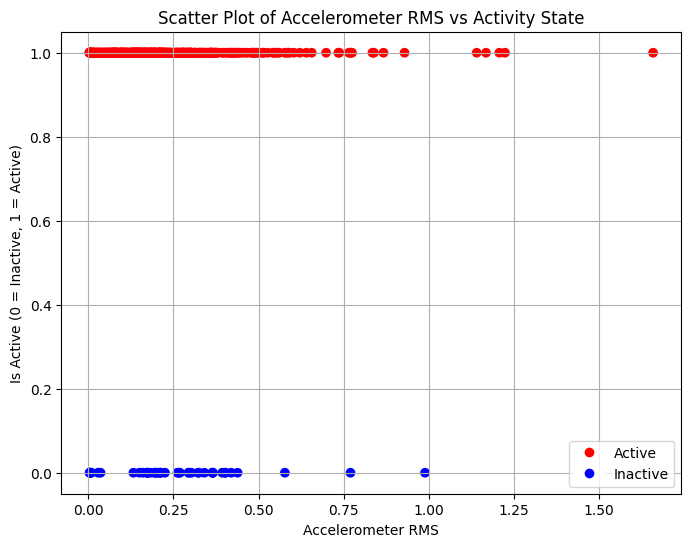

('prositvd105', datetime.date(2023, 2, 11))


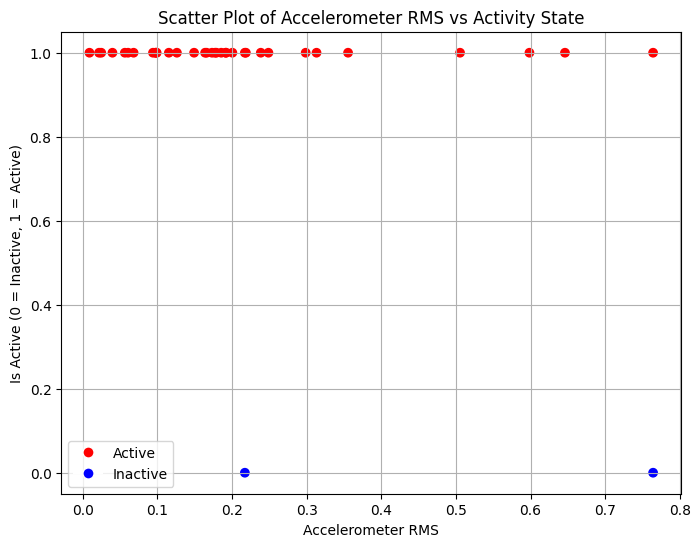

('prositvd105', datetime.date(2023, 2, 23))


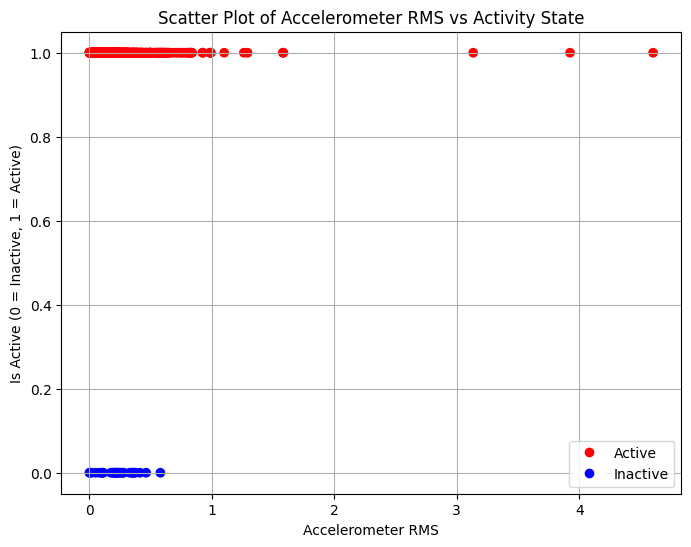

('prositvd105', datetime.date(2023, 2, 24))


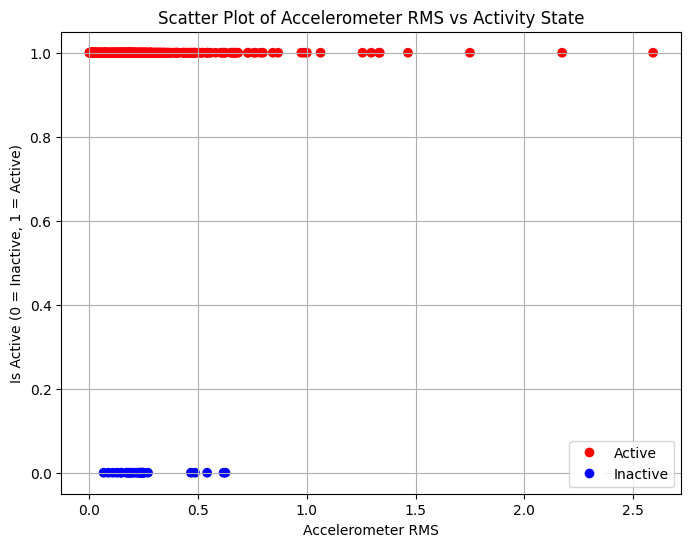

('prositvd105', datetime.date(2023, 2, 26))


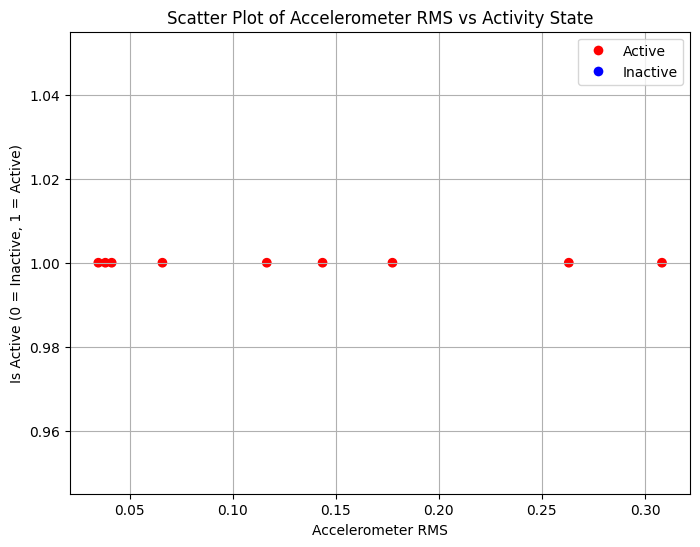

('prositvd105', datetime.date(2023, 2, 28))


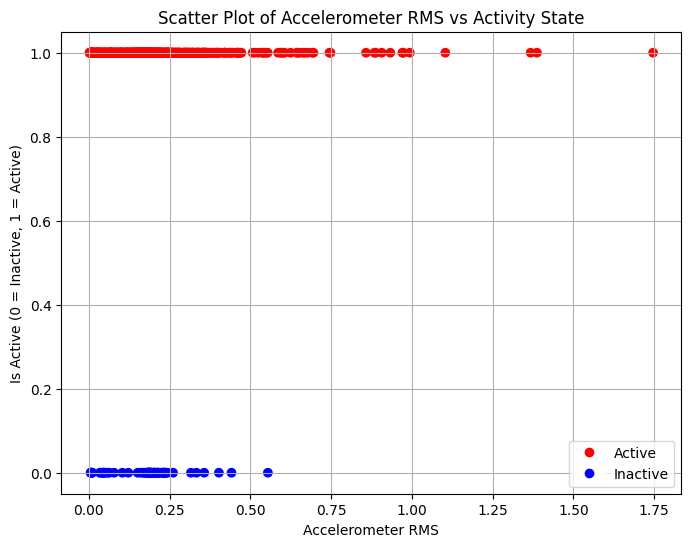

('prositvd106', datetime.date(2023, 2, 16))


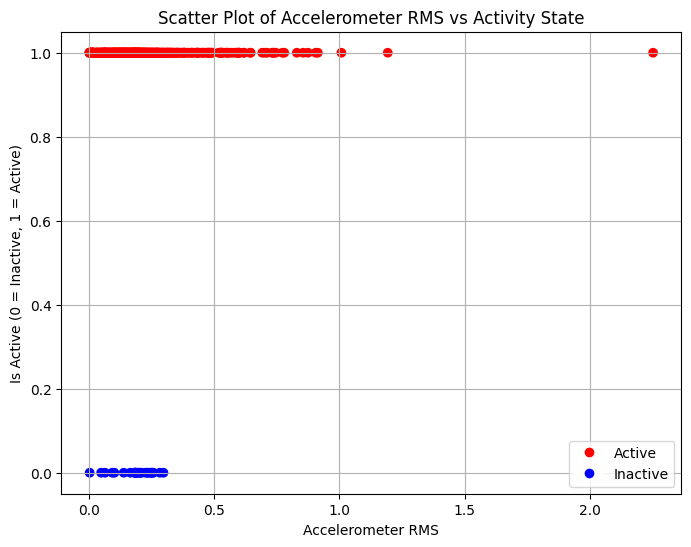

('prositvd106', datetime.date(2023, 2, 17))


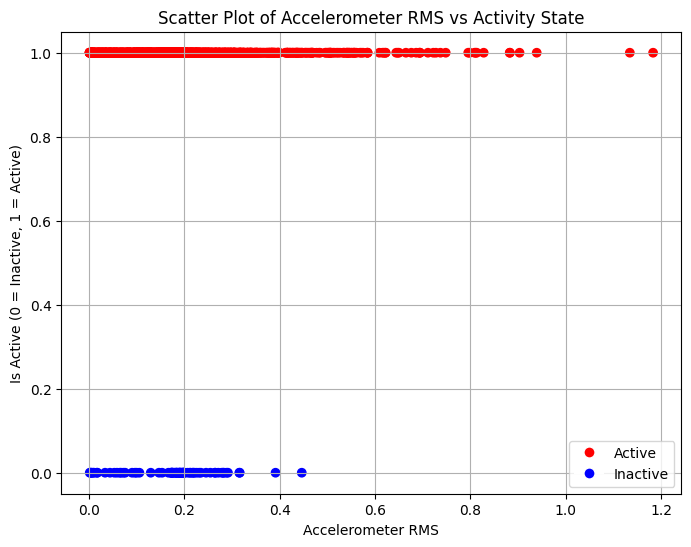

('prositvd106', datetime.date(2023, 2, 18))


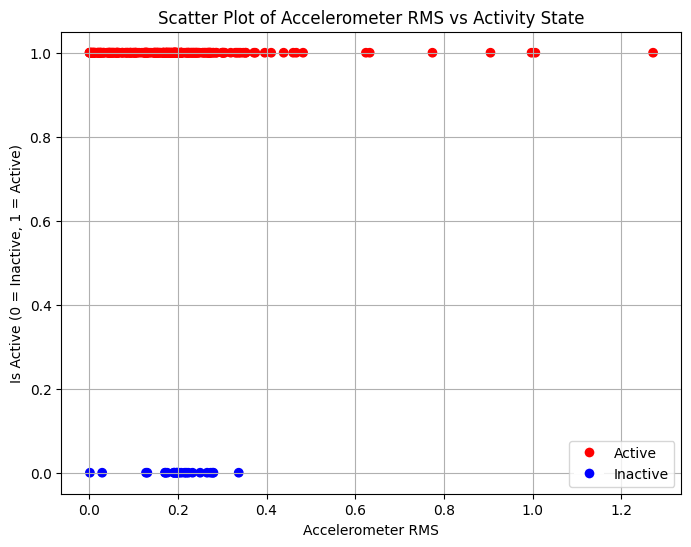

('prositvd106', datetime.date(2023, 2, 19))


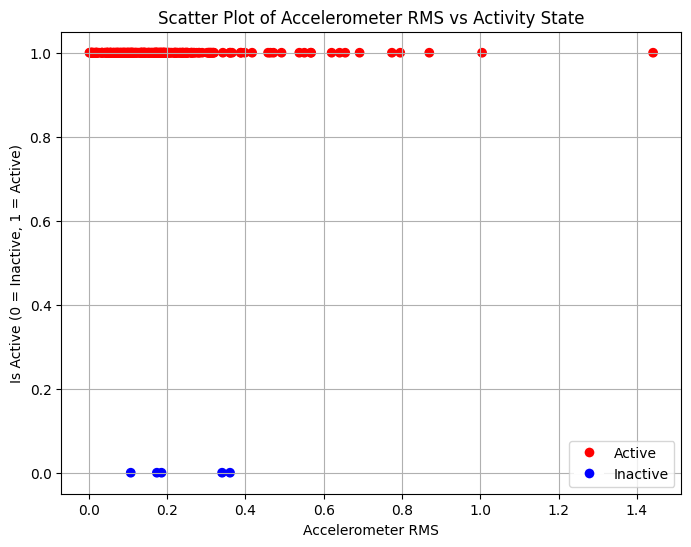

In [69]:
for i in range(10):
    sample_participant_date_tuple = participant_date_tuples[i]
    print(sample_participant_date_tuple)
    sample_participant_data = get_participant_data_for_date(df_joined_acc_activity_filtered, sample_participant_date_tuple)
    plot_active_vs_rms(sample_participant_data)

## Screen time from Lock state data.

In [ ]:
df_lock_state['measuredat'] = pd.to_datetime(df_lock_state['measuredat'])

# Define the logical time window.
window_start_time = pd.to_datetime('22:00:00').time()  # 10 PM
window_end_time = pd.to_datetime('07:00:00').time()    # 7 AM

# Function to assign logical day based on the window (because window can span over two calendar days).
def assign_logical_day(row):
    measured_time = row['measuredat'].time()
    
    if measured_time >= window_start_time:
        return row['measuredat'].date()  # Assign to the current day.
    else:
        return (row['measuredat'] - pd.Timedelta(days=1)).date()  # Assign to the previous day.

# Assign logical day to the DataFrame.
df_lock_state['logical_day'] = df_lock_state.apply(assign_logical_day, axis=1)

# Function to calculate screen times and metrics within logical windows.
def calculate_metrics(group):
    locked_time = pd.Timedelta(0)
    unlocked_time = pd.Timedelta(0)
    unlock_durations = []
    total_unlocks = 0

    previous_state = None
    previous_time = None
    
    # Set the logical start and end time boundaries based on the logical day.
    logical_start = pd.Timestamp.combine(group['logical_day'].iloc[0], window_start_time)
    logical_end = pd.Timestamp.combine(group['logical_day'].iloc[0] + pd.Timedelta(days=1), window_end_time)

    for _, row in group.iterrows():
        current_state = row['value0']
        current_time = row['measuredat']
        
        # Adjust previous time if crossing into the time window.
        if previous_time and previous_time < logical_start < current_time:
            previous_time = logical_start
        
        # Adjust current time if crossing the window end.
        if current_time > logical_end:
            current_time = logical_end

        # Valid transition: LOCKED -> UNLOCKED
        if previous_state == 'LOCKED' and current_state == 'UNLOCKED':
            if previous_time >= logical_start and current_time <= logical_end:
                locked_time += current_time - previous_time
        
        # Valid transition: UNLOCKED -> LOCKED
        elif previous_state == 'UNLOCKED' and current_state == 'LOCKED':
            if previous_time >= logical_start and current_time <= logical_end:
                duration = current_time - previous_time
                unlocked_time += duration
                unlock_durations.append(duration.total_seconds() / 60)  # Convert to minutes.
                total_unlocks += 1

        # Update the previous state and time.
        previous_state = current_state
        previous_time = current_time

    # Calculate statistics.
    mean_unlock = np.mean(unlock_durations) if unlock_durations else 0
    median_unlock = np.median(unlock_durations) if unlock_durations else 0
    max_unlock = max(unlock_durations) if unlock_durations else 0

    return pd.Series({
        'total_screen_locked_time': locked_time.total_seconds() / 60,
        'total_screen_unlocked_time': unlocked_time.total_seconds() / 60,
        'total_number_of_unlocks': total_unlocks,
        'mean_unlocked_duration': mean_unlock,
        'median_unlocked_duration': median_unlock,
        'max_unlocked_duration': max_unlock
    })

# Group by participant id and logical day, and apply the metric calculations.
result_df_lock_state = (
    df_lock_state.groupby(['participantid', 'logical_day'])
    .apply(calculate_metrics)
    .reset_index()
)

In [ ]:
result_df_lock_state.head(10)

## Screen time from Accelerometer data

In [ ]:
df_accelerometer['measuredat'] = pd.to_datetime(df_accelerometer['measuredat'])

# Convert the accelerometer values to numeric (float)
df_accelerometer['value0'] = pd.to_numeric(df_accelerometer['value0'], errors='coerce')
df_accelerometer['value1'] = pd.to_numeric(df_accelerometer['value1'], errors='coerce')
df_accelerometer['value2'] = pd.to_numeric(df_accelerometer['value2'], errors='coerce')

# Calculate movement magnitude (RMS) from accelerometer values
df_accelerometer['movement_magnitude'] = np.sqrt(df_accelerometer['value0']**2 + df_accelerometer['value1']**2 + df_accelerometer['value2']**2)

In [ ]:
# Define the logical time window
window_start_time = pd.to_datetime('22:00:00').time()  # 10 PM
window_end_time = pd.to_datetime('07:00:00').time()    # 7 AM

In [ ]:
# Assign logical day based on the time window.
def assign_logical_day(row):
    measured_time = row['measuredat'].time()
    
    if measured_time >= window_start_time:
        return row['measuredat'].date()  # Assign to the current day
    else:
        return (row['measuredat'] - pd.Timedelta(days=1)).date()  # Assign to the previous day

df_accelerometer['logical_day'] = df_accelerometer.apply(assign_logical_day, axis=1)

In [ ]:
# Calculate the median movement magnitude for each participant and logical day.
df_accelerometer['daily_median'] = df_accelerometer.groupby(['participantid', 'logical_day'])['movement_magnitude'].transform('median')

In [ ]:
# Create the 'is_asleep' column based on whether movement_magnitude is below the daily median
df_accelerometer['is_asleep'] = df_accelerometer['movement_magnitude'] < df_accelerometer['daily_median']

In [ ]:
# Function to calculate sleep times and other metrics, similar to how we handled the lock_state data.
def calculate_sleep_metrics(group):
    sleep_time = pd.Timedelta(0)
    wake_time = pd.Timedelta(0)
    sleep_durations = []
    total_sleep_segments = 0

    previous_state = None
    previous_time = None
    
    # Set the logical start and end time boundaries based on the logical day
    logical_start = pd.Timestamp.combine(group['logical_day'].iloc[0], window_start_time)
    logical_end = pd.Timestamp.combine(group['logical_day'].iloc[0] + pd.Timedelta(days=1), window_end_time)

    for _, row in group.iterrows():
        current_state = row['is_asleep']
        current_time = row['measuredat']
        
        # Adjust previous time if crossing into the time window.
        if previous_time and previous_time < logical_start < current_time:
            previous_time = logical_start
        
        # Adjust current time if crossing the window end.
        if current_time > logical_end:
            current_time = logical_end

        # Transition: Awake -> Asleep
        if previous_state == False and current_state == True:
            if previous_time >= logical_start and current_time <= logical_end:
                wake_time += current_time - previous_time
        
        # Transition: Asleep -> Awake
        elif previous_state == True and current_state == False:
            if previous_time >= logical_start and current_time <= logical_end:
                duration = current_time - previous_time
                sleep_time += duration
                sleep_durations.append(duration.total_seconds() / 60)  # Convert to minutes.
                total_sleep_segments += 1

        # Update the previous state and time.
        previous_state = current_state
        previous_time = current_time

    # Calculate statistics.
    mean_sleep_duration = np.mean(sleep_durations) if sleep_durations else 0
    median_sleep_duration = np.median(sleep_durations) if sleep_durations else 0
    max_sleep_duration = max(sleep_durations) if sleep_durations else 0

    return pd.Series({
        'total_sleep_time': sleep_time.total_seconds() / 60,
        'total_wake_time': wake_time.total_seconds() / 60,
        'total_sleep_segments': total_sleep_segments,
        'mean_sleep_duration': mean_sleep_duration,
        'median_sleep_duration': median_sleep_duration,
        'max_sleep_duration': max_sleep_duration
    })

# Group by participant id and logical day, and apply the metric calculations.
result_df_accel = (
    df_accelerometer.groupby(['participantid', 'logical_day'])
    .apply(calculate_sleep_metrics)
    .reset_index()
)

In [ ]:
result_df_accel.head(10)

In [ ]:
result_df_lock_state.head(10)